In [1]:
import altair as alt

In [2]:
from vega_datasets import data 

In [3]:
iris = data.iris()
iris.head()

petalLength  petalWidth  sepalLength  sepalWidth species
0          1.4         0.2          5.1         3.5  setosa
1          1.4         0.2          4.9         3.0  setosa
2          1.3         0.2          4.7         3.2  setosa
3          1.5         0.2          4.6         3.1  setosa
4          1.4         0.2          5.0         3.6  setosa

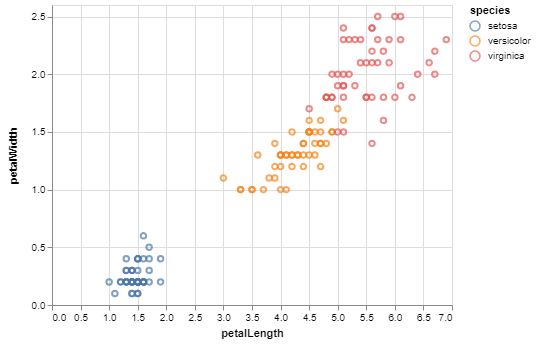

In [4]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

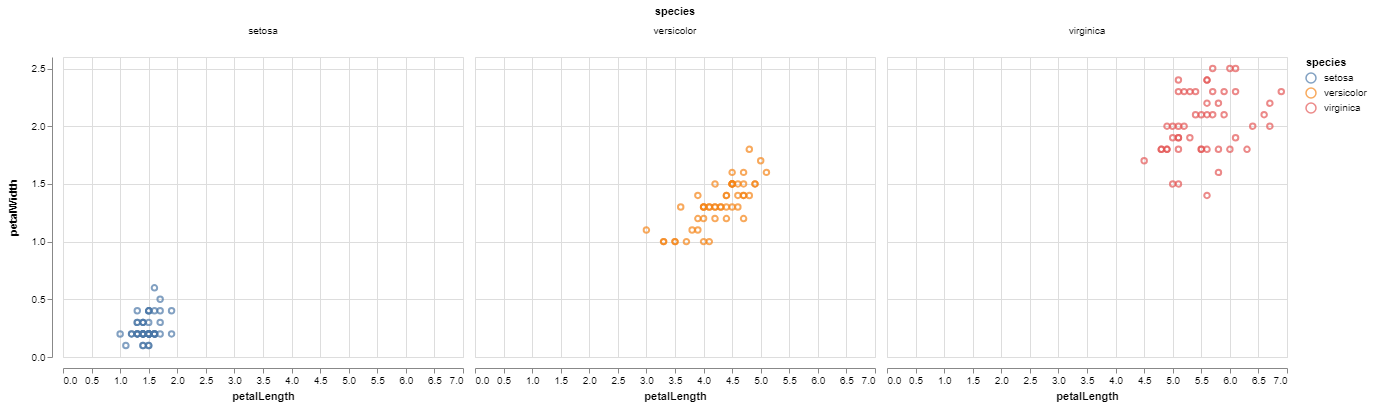

In [5]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species',
    column ='species'
)

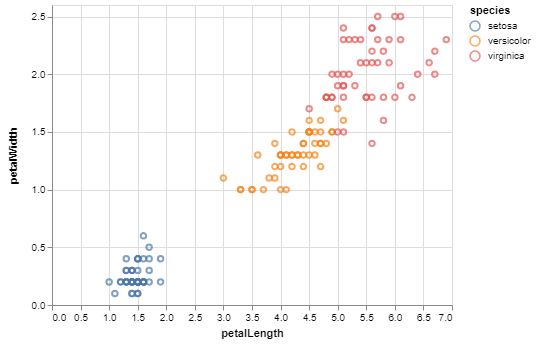

In [6]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive()

In [7]:
cars = data.cars()

In [8]:
cars.head()


Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

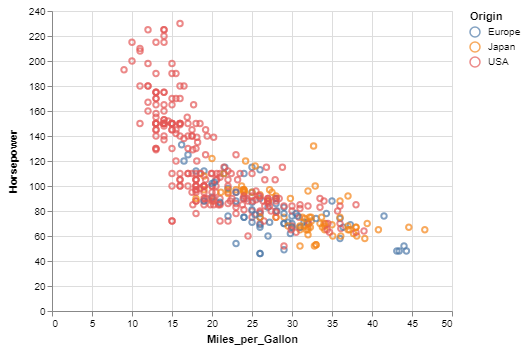

In [9]:
alt.Chart(cars).mark_point().encode(y='Horsepower',x='Miles_per_Gallon',color='Origin:N').interactive()


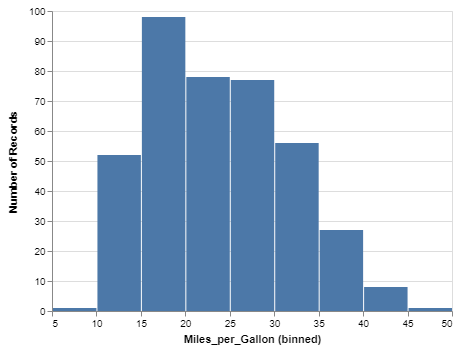

In [10]:
alt.Chart(cars).mark_bar().encode(x=alt.X('Miles_per_Gallon',bin=True) ,y= 'count()')
# function can be used in side the chart also 

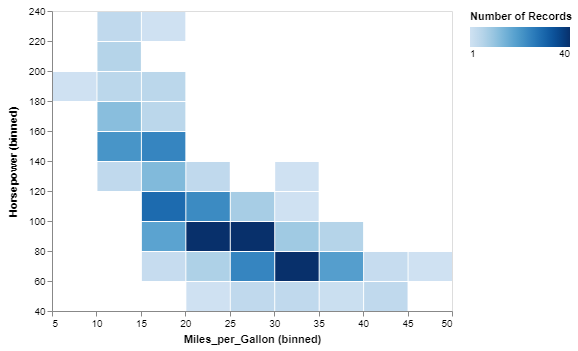

In [11]:
alt.Chart(cars).mark_bar().encode(x=alt.X('Miles_per_Gallon',bin=True) ,y= alt.Y('Horsepower', bin=True),color = 'count()')

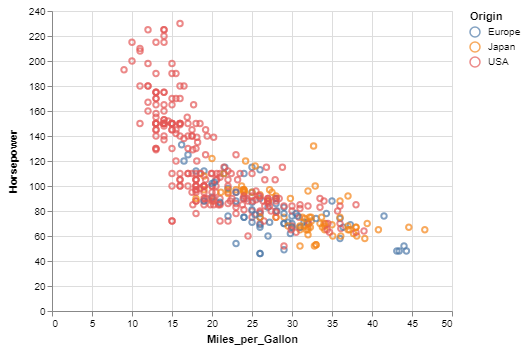

In [12]:
interval = alt.selection_interval()
alt.Chart(cars).mark_point().encode(y='Horsepower',x='Miles_per_Gallon',color='Origin:N').properties(selection = interval)

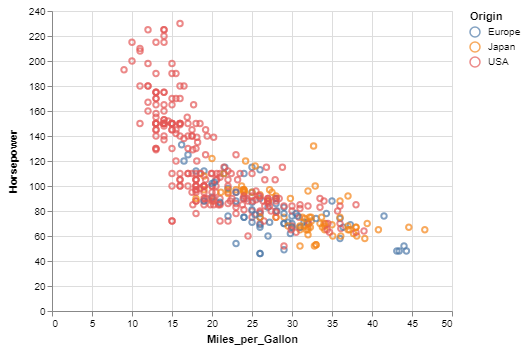

In [13]:
interval = alt.selection_interval(encodings=['x','y'])
alt.Chart(cars).mark_point().encode(y='Horsepower',x='Miles_per_Gallon',color='Origin:N').properties(selection = interval)

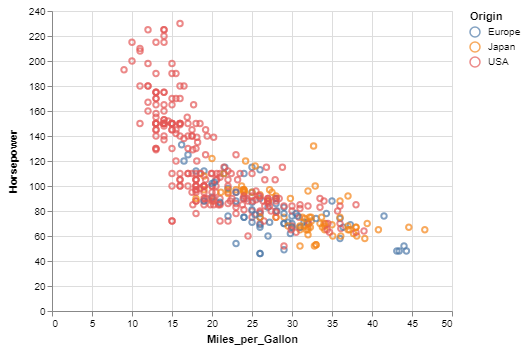

In [14]:
interval = alt.selection_interval(encodings=['x','y'])
alt.Chart(cars).mark_point().encode(y='Horsepower',x='Miles_per_Gallon',
                                    color=alt.condition(interval,'Origin',alt.value('lightgray'))
                                   ).properties(selection = interval)

In [15]:
interval = alt.selection_interval(encodings=['x','y'])
chart = alt.Chart(cars).mark_point().encode(y='Horsepower',x='Miles_per_Gallon',
                                    color=alt.condition(interval,'Origin',alt.value('lightgray'))
                                   ).properties(selection = interval)


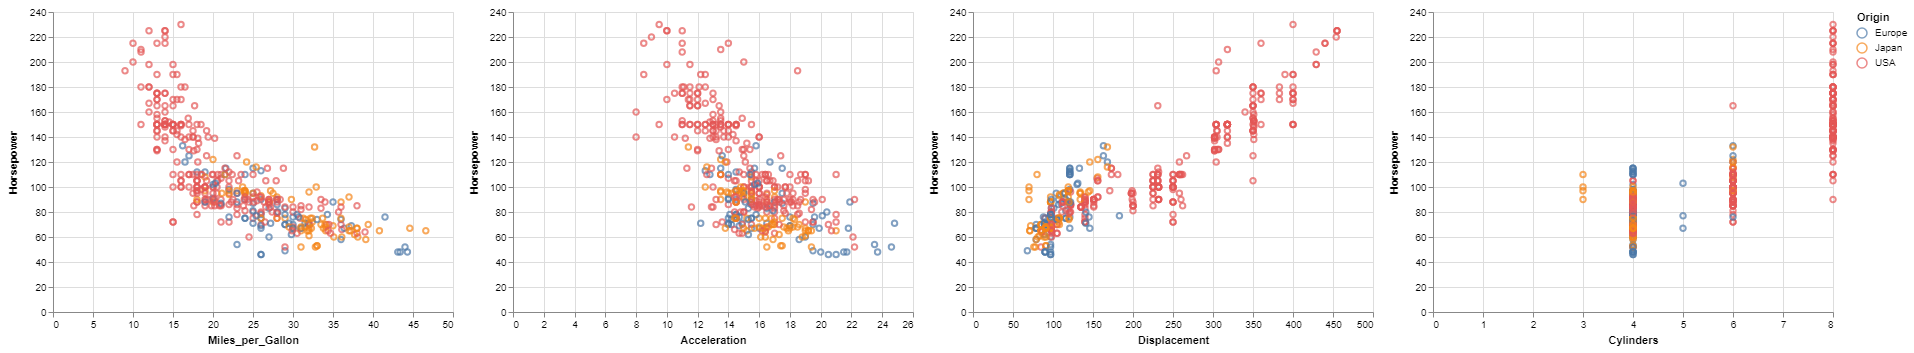

In [16]:
chart | chart.encode(x='Acceleration') |chart.encode(x='Displacement')| chart.encode(x='Cylinders')

In [17]:
interval = alt.selection_interval(encodings=['x','y'])
chart = alt.Chart(cars).mark_point().encode(y='Horsepower',x='Miles_per_Gallon',
                                    color=alt.condition(interval,'Origin',alt.value('lightgray'))
                                   ).properties(selection = interval) 
hist = alt.Chart(cars).mark_bar().encode(x='count()',y ='Origin',color='Origin').transform_filter(interval)
year = alt.Chart(cars).mark_bar().encode(x='count()',y ='Year',color='Origin').transform_filter(interval)
withgt =alt.Chart(cars).mark_bar().encode(x=alt.X('Weight_in_lbs',bin=True) ,y= 'count()').transform_filter(interval)

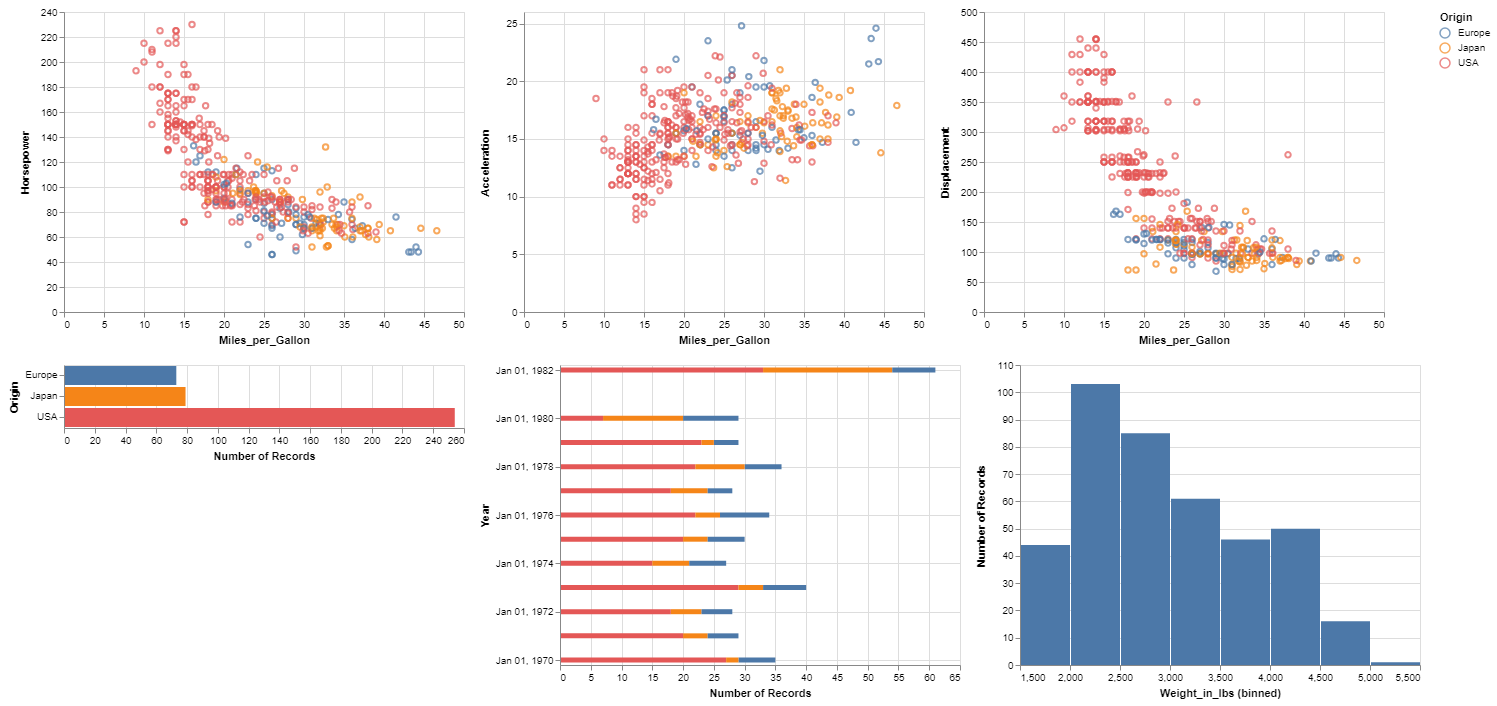

In [18]:
(chart | chart.encode(y='Acceleration') |chart.encode(y='Displacement')) & (hist | year | withgt)
                                                                           

In [19]:
charts = alt.vconcat(chart, hist)


In [21]:
# charts.save('chart.svg')

In [22]:
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

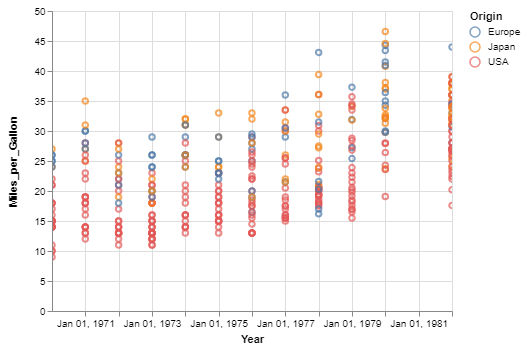

In [23]:
alt.Chart(cars).mark_point().encode(y='Miles_per_Gallon',x='Year',
                                    color='Origin').interactive()
                                   

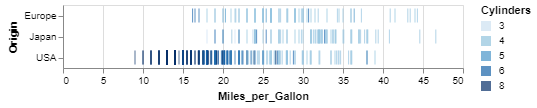

In [24]:
alt.Chart(cars).mark_tick().encode(x='Miles_per_Gallon:Q',y='Origin:N',
                                    color='Cylinders:O')

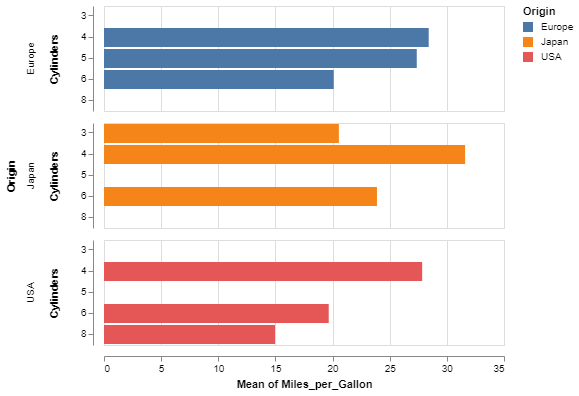

In [25]:
alt.Chart(cars).mark_bar().encode(
    y='Cylinders:O',
    row='Origin',
    color='Origin',
    x='mean(Miles_per_Gallon)'
)

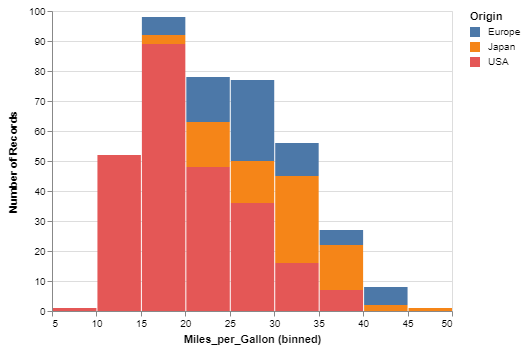

In [26]:
# dont have to specify how x and y for encoding altera understands how to use it 
alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon',bin=True),
    alt.Y('count()'),
    alt.Color('Origin')
)

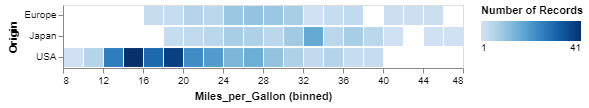

In [27]:
alt.Chart(cars).mark_bar().encode(
    x= alt.X('Miles_per_Gallon',bin=alt.Bin(maxbins=20)),
    color='count()',
    y = 'Origin'
)

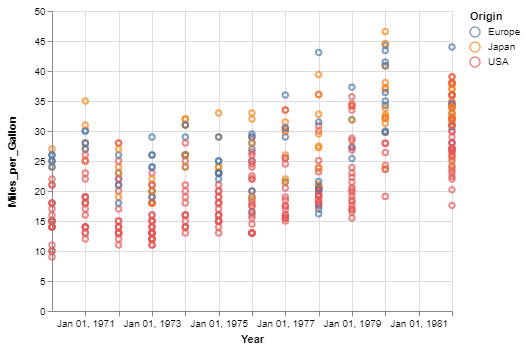

In [28]:
alt.Chart(cars).mark_point().encode(
    x='Year:T',
    color='Origin',
    y='Miles_per_Gallon'
)

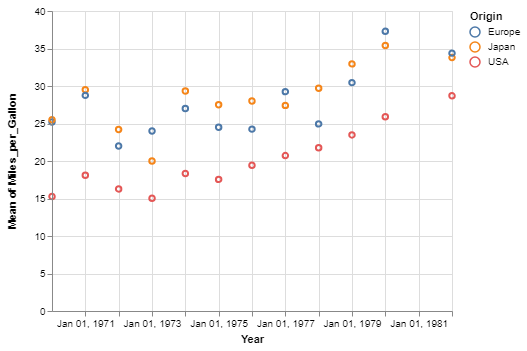

In [29]:
alt.Chart(cars).mark_point().encode(
    x='Year:T',
    color='Origin',
    y='mean(Miles_per_Gallon)'
)

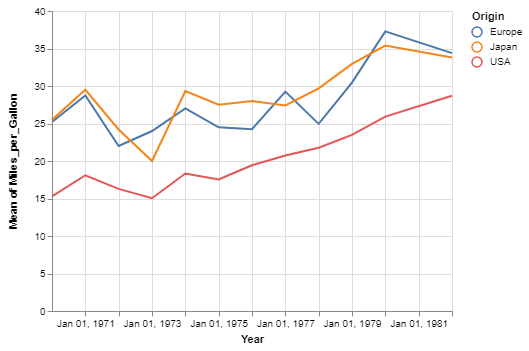

In [30]:
alt.Chart(cars).mark_line().encode(
    x='Year:T',
    color='Origin',
    y='mean(Miles_per_Gallon)'
)

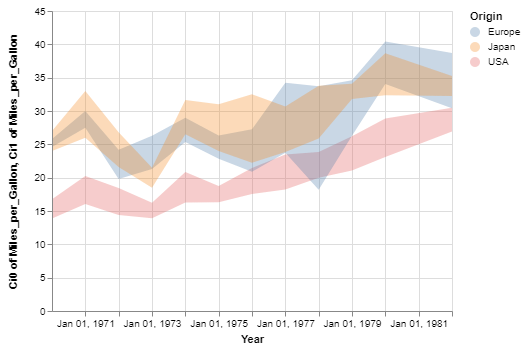

In [31]:
alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year:T',
    color='Origin',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)
# ci0 ,  ci1: 0th confidence interval and 1st confident interval 

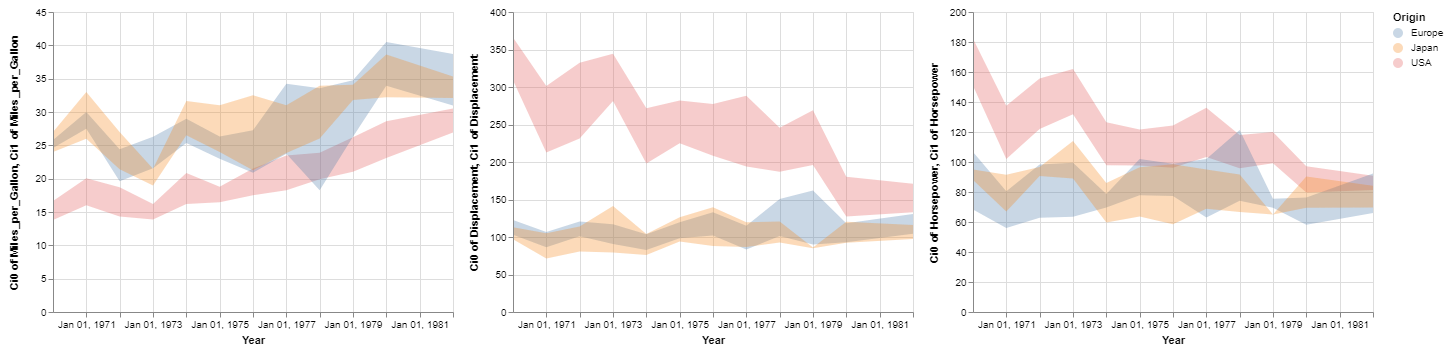

In [32]:
alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year:T',
    color='Origin',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
) | alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year:T',
    color='Origin',
    y='ci0(Displacement)',
    y2='ci1(Displacement)'
) | alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year:T',
    color='Origin',
    y='ci0(Horsepower)',
    y2='ci1(Horsepower)'
) 

In [44]:
temps = data.seattle_temps()

In [45]:
temps.head()

date  temp
0 2010-01-01 00:00:00  39.4
1 2010-01-01 01:00:00  39.2
2 2010-01-01 02:00:00  39.0
3 2010-01-01 03:00:00  38.9
4 2010-01-01 04:00:00  38.8

In [35]:


#alter max row that a can be rendered is 5000
# one way is alt.data_transformers.enable('default',max_row=None)


# Automoatically load data from disk using 
# alt.data_transformers.enable('json')
# if u do this method insted of embeding data in the notebook , it will be saved in data json file and loads from it 


In [36]:
#alt.data_transformers.enable('json')

In [42]:
# alt.Chart(temps).mark_line().to_dict()

In [47]:
# alt.Chart(temps).mark_line().encode(
#     x='date:T',
#     y='temp:Q'
# )

In [48]:
# alt.Chart(temps).mark_bar().encode(
#     x=alt.X('date:T',timeUnit='month'),
#     y='mean(temp):Q'
# )

In [49]:
# alt.Chart(temps).mark_rect().encode(
#     x=alt.X('date:O',timeUnit='hours'),
#     y=alt.Y('date:O',timeUnit='month'),
#     color='mean(temp):Q'
# )

In [ ]:
# intervals

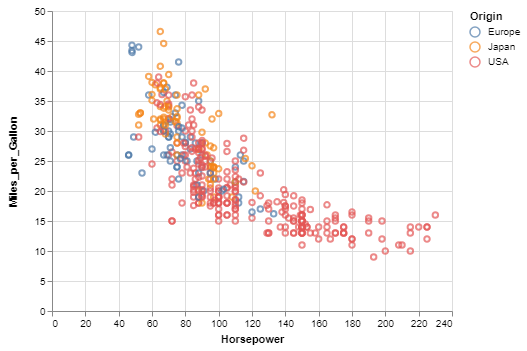

In [50]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y= 'Miles_per_Gallon:Q',
    color='Origin',
    tooltip='Name'
    
).interactive()

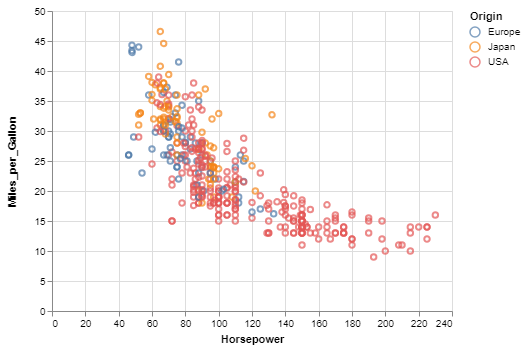

In [51]:
#interval = alt.selection_interval(translate=False)
#interval = alt.selection_interval(zoom=False)
#interval = alt.selection_interval(encodings=['x'])
interval = alt.selection_interval(encodings=['y'])
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y= 'Miles_per_Gallon:Q',
#     color='Origin',
    color=alt.condition(interval,'Origin',alt.value('lightgray')),
    tooltip='Name'
    
).properties(
    selection= interval
)

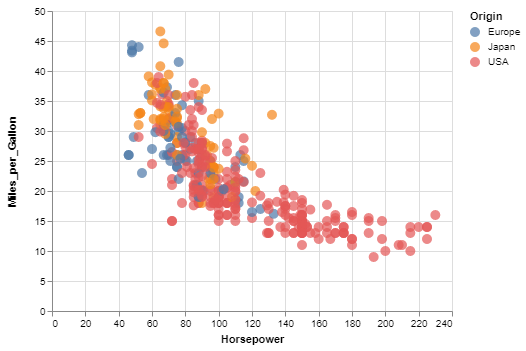

In [52]:
#  interval = alt.selection_single()
# interval = alt.selection_single(on='mouseover',nearest=True)
interval = alt.selection_multi(encodings=['color'])
alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y= 'Miles_per_Gallon:Q',
#     color='Origin',
    color=alt.condition(interval,'Origin',alt.value('lightgray')),
    tooltip='Name'
    
).properties(
    selection= interval
)